STEP 1: Import Libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

STEP 2: Load the Dataset

In [36]:
# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


STEP 3: Encode Categorical Variables

In [37]:
# Encode categorical variables
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['OverTime'] = le.fit_transform(data['OverTime'])

STEP 4: Select Required Features

In [38]:
# Select only the required features
features = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany']
X = data[features]
y = data['Attrition']

STEP 5: Split the Data into Training and Testing Sets

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP 6: Standardize the Numerical Features

In [40]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

STEP 7: Reshape Input Data for RNN

In [41]:
# Reshape input data to be 3-dimensional for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

STEP 8: Build the RNN Model

In [42]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

STEP 9: Compile the Model

In [43]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

STEP 10: Train the Model

In [44]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
30/30 [==============================] - 4s 17ms/step - loss: 0.6261 - accuracy: 0.6574 - val_loss: 0.5435 - val_accuracy: 0.7839
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.7511 - val_loss: 0.4636 - val_accuracy: 0.8178
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8330 - val_loss: 0.4185 - val_accuracy: 0.8263
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.4023 - accuracy: 0.8447 - val_loss: 0.4062 - val_accuracy: 0.8178
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8489 - val_loss: 0.4027 - val_accuracy: 0.8220
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.8468 - val_loss: 0.4041 - val_accuracy: 0.8220
Epoch 7/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8543 - val_loss: 0.3998 - val_accuracy: 0.8263
Epoch 8/50
30/30 [=

STEP 11: Evaluate the Model

10/10 [==============================] - 1s 5ms/step
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.56      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.72      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294

Confusion Matrix:


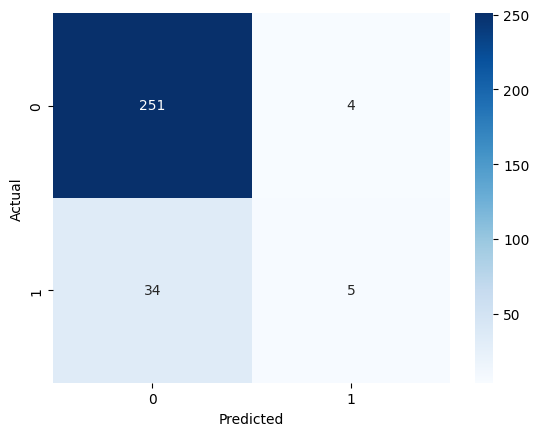

In [45]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

STEP 12: Plot Training & Validation Accuracy

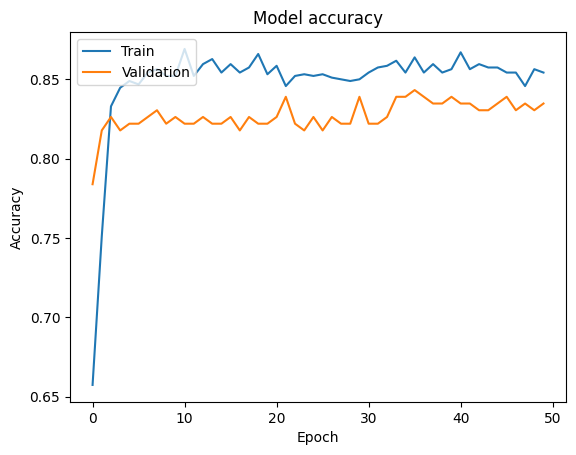

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

STEP 13: Plot Training & Validation Loss

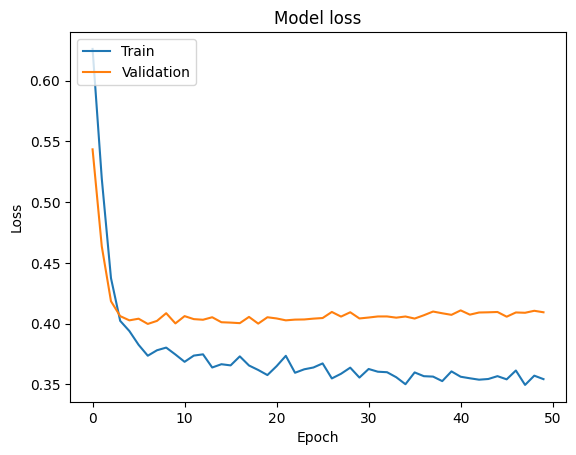

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

STEP 14: Define Prediction Function

In [48]:
# Function to make predictions based on user input
def predict_attrition(age, distance_from_home, environment_satisfaction, job_satisfaction, monthly_income, over_time, total_working_years, years_at_company):
    # Create a dataframe from the input
    input_data = pd.DataFrame([[age, distance_from_home, environment_satisfaction, job_satisfaction, monthly_income, over_time, total_working_years, years_at_company]],
                              columns=features)
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Reshape input data to be 3-dimensional for RNN
    input_data_scaled = input_data_scaled.reshape((input_data_scaled.shape[0], 1, input_data_scaled.shape[1]))

    # Make prediction
    prediction_prob = model.predict(input_data_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return 'Yes' if prediction[0] == 1 else 'No'

STEP 15: Create Widgets for User Input,Prediction Button and Display

In [50]:
# Create widgets for user input
age_widget = widgets.IntSlider(min=18, max=60, description='Age')
distance_from_home_widget = widgets.IntSlider(min=1, max=30, description='Distance From Home')
environment_satisfaction_widget = widgets.IntSlider(min=1, max=4, description='Environment Satisfaction')
job_satisfaction_widget = widgets.IntSlider(min=1, max=4, description='Job Satisfaction')
monthly_income_widget = widgets.IntSlider(min=1000, max=20000, description='Monthly Income')
over_time_widget = widgets.Dropdown(options=['No', 'Yes'], description='Over Time')
total_working_years_widget = widgets.IntSlider(min=0, max=40, description='Total Working Years')
years_at_company_widget = widgets.IntSlider(min=0, max=40, description='Years At Company')

# Display widgets
display(age_widget, distance_from_home_widget, environment_satisfaction_widget, job_satisfaction_widget, monthly_income_widget, over_time_widget,
        total_working_years_widget, years_at_company_widget)

# Create a button to make predictions
predict_button = widgets.Button(description='Predict Attrition')

# Define the button's action
def on_predict_button_clicked(b):
    prediction = predict_attrition(age_widget.value, distance_from_home_widget.value, environment_satisfaction_widget.value,
                                   job_satisfaction_widget.value, monthly_income_widget.value, le.transform([over_time_widget.value])[0],
                                   total_working_years_widget.value, years_at_company_widget.value)
    print(f'Attrition Prediction: {prediction}')

# Assign the action to the button
predict_button.on_click(on_predict_button_clicked)

# Display the button
display(predict_button)

IntSlider(value=18, description='Age', max=60, min=18)

IntSlider(value=1, description='Distance From Home', max=30, min=1)

IntSlider(value=1, description='Environment Satisfaction', max=4, min=1)

IntSlider(value=1, description='Job Satisfaction', max=4, min=1)

IntSlider(value=1000, description='Monthly Income', max=20000, min=1000)

Dropdown(description='Over Time', options=('No', 'Yes'), value='No')

IntSlider(value=0, description='Total Working Years', max=40)

IntSlider(value=0, description='Years At Company', max=40)

Button(description='Predict Attrition', style=ButtonStyle())

1/1 [==============================] - 0s 22ms/step
Attrition Prediction: Yes
